<h1>Prediction COVID-19 Contaction Based on Political Affiliation (and other factors)</h1>
<p>description</p>

<h3>Import dependencies</h3>
<ul>
    <li>pandas - data analysis and visualization</li>
    <li>cleaner - local data-cleaning package for running sql sanitizing
</ul>

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import f1_score
from scipy import stats

import pandas as pd
import numpy as np

import sys
sys.path.insert(0, './cleaner')
import cleaner

from matplotlib import pyplot
%matplotlib inline

ROW_LIMIT = 25

<h2>Analysing Original Data</h2>
<p>description</p>

<h3>COVID-19 cases per county in the U.S.</h3>
<p>description</p>

In [2]:
original_cases = pd.read_csv(cleaner.DIRTY_CASES)
original_cases.head(ROW_LIMIT)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
5,2020-01-25,Orange,California,6059.0,1,0
6,2020-01-25,Cook,Illinois,17031.0,1,0
7,2020-01-25,Snohomish,Washington,53061.0,1,0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0
9,2020-01-26,Los Angeles,California,6037.0,1,0


<h3>Political party affiliation by per county in the U.S.</h3>
<p>description</p>

In [3]:
original_party = pd.read_csv(cleaner.DIRTY_PARTY)
original_party.head(25)

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version
0,2000,Alabama,AL,Autauga,1001.0,President,Al Gore,democrat,4942.0,17208,20191203
1,2000,Alabama,AL,Autauga,1001.0,President,George W. Bush,republican,11993.0,17208,20191203
2,2000,Alabama,AL,Autauga,1001.0,President,Ralph Nader,green,160.0,17208,20191203
3,2000,Alabama,AL,Autauga,1001.0,President,Other,NaN,113.0,17208,20191203
4,2000,Alabama,AL,Baldwin,1003.0,President,Al Gore,democrat,13997.0,56480,20191203
5,2000,Alabama,AL,Baldwin,1003.0,President,George W. Bush,republican,40872.0,56480,20191203
6,2000,Alabama,AL,Baldwin,1003.0,President,Ralph Nader,green,1033.0,56480,20191203
7,2000,Alabama,AL,Baldwin,1003.0,President,Other,NaN,578.0,56480,20191203
8,2000,Alabama,AL,Barbour,1005.0,President,Al Gore,democrat,5188.0,10395,20191203
9,2000,Alabama,AL,Barbour,1005.0,President,George W. Bush,republican,5096.0,10395,20191203


<h3>Population Demographics per county in the U.S.</h3>
<p>description</p>

In [4]:
original_dems = pd.read_csv(cleaner.DIRTY_DEMS)
original_dems.head(25)

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,1,1,Alabama,Autauga County,1,0,54571,26569,28002,...,607,538,57,48,26,32,9,11,19,10
1,50,1,1,Alabama,Autauga County,1,1,3579,1866,1713,...,77,56,9,5,4,1,0,0,2,1
2,50,1,1,Alabama,Autauga County,1,2,3991,2001,1990,...,64,66,2,3,2,7,2,3,2,0
3,50,1,1,Alabama,Autauga County,1,3,4290,2171,2119,...,51,57,13,7,5,5,2,1,1,1
4,50,1,1,Alabama,Autauga County,1,4,4290,2213,2077,...,48,44,7,5,0,2,2,1,3,1
5,50,1,1,Alabama,Autauga County,1,5,3080,1539,1541,...,62,34,2,4,2,3,0,1,1,1
6,50,1,1,Alabama,Autauga County,1,6,3157,1543,1614,...,54,39,5,3,0,0,2,0,5,2
7,50,1,1,Alabama,Autauga County,1,7,3330,1594,1736,...,56,53,4,6,0,2,0,1,2,1
8,50,1,1,Alabama,Autauga County,1,8,4157,2004,2153,...,50,37,2,4,4,2,0,2,1,2
9,50,1,1,Alabama,Autauga County,1,9,4086,1974,2112,...,47,34,3,1,2,3,0,0,1,1


<h2>Cleaning Data</h2>
<p>description</p>

<h3>Cleaning COVID-19 cases</h3>
<p>description</p>

In [5]:
cleaner.clean_cases()
cleaned_cases = pd.read_csv(cleaner.CLEANED_CASES_SRC)
cleaned_cases.head(ROW_LIMIT)

,fips,state,county,county_date,cases
0,1001,Alabama,Autauga,2020-11-01,2173
1,1003,Alabama,Baldwin,2020-11-01,6966
2,1005,Alabama,Barbour,2020-11-01,1061
3,1011,Alabama,Bullock,2020-11-01,655
4,1015,Alabama,Calhoun,2020-11-01,4892
5,1021,Alabama,Chilton,2020-11-01,1946
6,1029,Alabama,Cleburne,2020-11-01,590
7,1033,Alabama,Colbert,2020-11-01,2307
8,1035,Alabama,Conecuh,2020-10-31,577
9,1037,Alabama,Coosa,2020-11-01,223


<h3>Cleaning political party affiliations</h3>
<p>description</p>

In [6]:
cleaner.clean_party()
cleaned_party = pd.read_csv(cleaner.CLEANED_PARTY_SRC)
cleaned_party.head(ROW_LIMIT)

,fips,state,county,republican_ratio,democrat_ratio,political_affiliation
0,1001,Alabama,Autauga,0.76,0.24,republican
1,1003,Alabama,Baldwin,0.81,0.19,republican
2,1005,Alabama,Barbour,0.53,0.47,republican
3,1007,Alabama,Bibb,0.79,0.21,republican
4,1009,Alabama,Blount,0.92,0.08,republican
5,1011,Alabama,Bullock,0.25,0.75,democrat
6,1013,Alabama,Butler,0.57,0.43,republican
7,1015,Alabama,Calhoun,0.72,0.28,republican
8,1017,Alabama,Chambers,0.58,0.42,republican
9,1019,Alabama,Cherokee,0.86,0.14,republican


<h3>Cleaning demographics</h3>
<p>description</p>

In [7]:
cleaner.clean_dems()
cleaned_dems= pd.read_csv(cleaner.CLEANED_DEMS_SRC)
cleaned_dems.head(ROW_LIMIT)

,fips,state,county,population,male,female,white_male,white_female,black_male,black_female,hispanic_male,hispanic_female,asian_male,asian_female
0,1001,Alabama,Autauga County,17748,8744,9004,6588,6650,1832,2037,323,258,133,148
1,1003,Alabama,Baldwin County,59850,29564,30286,25096,25746,3427,3347,1915,1599,342,496
2,1005,Alabama,Barbour County,8437,5098,3339,2261,1455,2697,1810,309,159,22,18
3,1007,Alabama,Bibb County,7777,4545,3232,2896,2566,1586,622,175,103,9,3
4,1009,Alabama,Blount County,17150,8606,8544,8277,8230,178,112,1121,888,19,28
5,1011,Alabama,Bullock County,3574,2166,1408,635,271,1462,1077,204,162,4,5
6,1013,Alabama,Butler County,5902,2702,3200,1346,1402,1244,1709,46,36,87,59
7,1015,Alabama,Calhoun County,36412,17806,18606,13289,13376,3968,4586,897,721,163,247
8,1017,Alabama,Chambers County,10065,4903,5162,2655,2656,2043,2367,161,106,128,77
9,1019,Alabama,Cherokee County,6805,3420,3385,3170,3192,173,121,76,57,7,8


<h3>Joining cleaned data</h3>
<p>description</p>

In [8]:
cleaner.finalize()

cleaned_data = pd.read_csv(cleaner.FINAL_SRC)
cleaned_data.head(ROW_LIMIT)

,FIPS,county_date,state,county,population,male,female,white_male,white_female,black_male,...,hispanic_male,hispanic_female,asian_male,asian_female,republican_ratio,democrat_ratio,political_affiliation,cases,percent_risk,risk_classification
0,10003,2020-11-01,Delaware,New Castle County,185145.0,92032,93113,58897,57834,23567,...,11108,10325,6982,6769,0.38,0.62,democrat,13259.0,7.0,0
1,10005,2020-11-01,Delaware,Sussex County,54497.0,27294,27203,21303,20961,4423,...,3983,3330,459,587,0.63,0.37,republican,8170.0,15.0,0
2,1001,2020-11-01,Alabama,Autauga County,17748.0,8744,9004,6588,6650,1832,...,323,258,133,148,0.76,0.24,republican,2173.0,12.0,0
3,1003,2020-11-01,Alabama,Baldwin County,59850.0,29564,30286,25096,25746,3427,...,1915,1599,342,496,0.81,0.19,republican,6966.0,12.0,0
4,1005,2020-11-01,Alabama,Barbour County,8437.0,5098,3339,2261,1455,2697,...,309,159,22,18,0.53,0.47,republican,1061.0,13.0,0
5,1011,2020-11-01,Alabama,Bullock County,3574.0,2166,1408,635,271,1462,...,204,162,4,5,0.25,0.75,democrat,655.0,18.0,1
6,1015,2020-11-01,Alabama,Calhoun County,36412.0,17806,18606,13289,13376,3968,...,897,721,163,247,0.72,0.28,republican,4892.0,13.0,0
7,1021,2020-11-01,Alabama,Chilton County,13618.0,6779,6839,5855,5866,746,...,761,556,44,50,0.84,0.16,republican,1946.0,14.0,0
8,1029,2020-11-01,Alabama,Cleburne County,4249.0,2145,2104,2047,2005,62,...,74,44,2,4,0.90,0.10,republican,590.0,14.0,0
9,1033,2020-11-01,Alabama,Colbert County,16125.0,7971,8154,6422,6435,1324,...,324,203,41,64,0.71,0.29,republican,2307.0,14.0,0


<h2>Visualizing Data</h2>
<p>description</p>

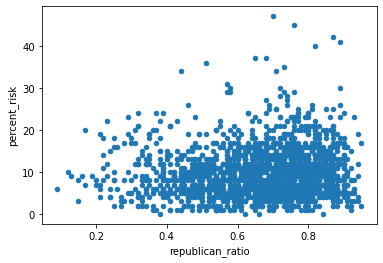

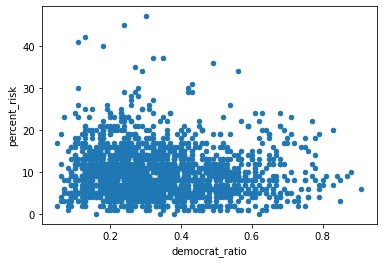

In [10]:
x_reps = 'republican_ratio'
x_dems = 'democrat_ratio'
y = 'percent_risk'
cleaned_data[[x_reps,y]].plot(x=x_reps,y=y,kind='scatter')
cleaned_data[[x_dems,y]].plot(x=x_dems,y=y,kind='scatter')

<p>feeding half of data to learn from...</p>

In [63]:
ROW_COUNT = cleaned_data.shape[0]
HALF_DATA = round(ROW_COUNT / 2)

# replace political affiliation (string) with 0-rep, 1-dem
cleaned_data = cleaned_data.replace('republican', 0)
cleaned_data = cleaned_data.replace('democrat', 1)

# drop un-needed columns
# cleaned_data = cleaned_data.drop(['risk_classification','state','county','county_date','cases'], axis=1)
cleaned_data = cleaned_data.drop(['state','county','county_date','cases'], axis=1)

In [64]:
## feature_scale everything but FIPS party_affilication:
features_to_scale = [
    'population', 
    'percent_risk',
    'male', 'female', 
    'white_male', 
    'white_female',
    'black_male', 
    'black_female', 
    'hispanic_male', 
    'hispanic_female',
    'asian_male', 
    'asian_female'
]
min_max_scaler = MinMaxScaler()
cleaned_data[features_to_scale] = min_max_scaler.fit_transform(cleaned_data[features_to_scale])

In [65]:
# tsplit data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     cleaned_data.iloc[:,:-1],
#     cleaned_data['risk_classification'])
X_train, X_test, y_train, y_test = train_test_split(
    cleaned_data.drop('risk_classification',axis=1),
    cleaned_data['risk_classification'],
    test_size=0.25, 
    train_size=0.75)

# X_train[features_to_scale] = min_max_scaler.fit_transform(X_train[features_to_scale])


# # train and fit model
log_reg = LogisticRegression(solver='lbfgs')
clf = log_reg.fit(X_train, y_train)

In [66]:
X_train
# y_train

,FIPS,population,male,female,white_male,white_female,black_male,black_female,hispanic_male,hispanic_female,asian_male,asian_female,republican_ratio,democrat_ratio,political_affiliation,percent_risk
200,16057,0.004353,0.004623,0.004079,0.005826,0.005317,0.000757,0.000276,0.000501,0.000463,0.000969,0.000968,0.55,0.45,0,0.127660
60,12075,0.002711,0.002640,0.002784,0.003126,0.003365,0.002834,0.002648,0.000589,0.000552,0.000148,0.000157,0.74,0.26,0,0.234043
37,12007,0.002364,0.002896,0.001821,0.002635,0.002052,0.008892,0.002601,0.000398,0.000124,0.000134,0.000072,0.76,0.24,0,0.297872
61,12081,0.025866,0.025394,0.026349,0.029179,0.030511,0.027916,0.027507,0.011980,0.011398,0.004629,0.005302,0.60,0.40,0,0.297872
1082,40135,0.003271,0.003226,0.003318,0.002767,0.002946,0.000746,0.000400,0.000325,0.000311,0.000334,0.000259,0.79,0.21,0,0.234043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2016,0.000636,0.000895,0.000372,0.000420,0.000114,0.001291,0.000090,0.000279,0.000089,0.002264,0.001347,0.56,0.44,0,0.085106
633,28017,0.001392,0.001404,0.001380,0.000987,0.000908,0.006350,0.005762,0.000163,0.000121,0.000048,0.000044,0.54,0.46,0,0.361702
1392,48331,0.001754,0.001694,0.001817,0.002020,0.002196,0.001674,0.001546,0.001122,0.001151,0.000108,0.000259,0.76,0.24,0,0.170213
1448,48485,0.012472,0.013758,0.011160,0.015261,0.012962,0.018510,0.010606,0.005693,0.004449,0.002153,0.001848,0.77,0.23,0,0.191489


In [67]:
clf.score(X_test, y_test)
clf.predict_proba(X_test)[:,0] > .8

array([ True,  True,  True,  True, False, False,  True, False, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True, False, False,  True, False,
        True,  True, False,  True, False, False,  True, False, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True, False,  True, False, False, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True, False, False,  True,  True, False,  True, False,  True,
        True, False,  True,  True, False, False,  True,  True, False,
        True, False,  True,  True,  True,  True, False, False,  True,
       False,  True,

In [30]:
y_pred = clf.predict_proba(X_test)[:,0] > .4
precision_recall_fscore_support(y_test, y_pred, average='micro')
clf.score(X_test, y_test)
# y_train_pred, y_test_pred

0.8722466960352423

In [35]:
cleaner.finalize()
cleaned_data = pd.read_csv(cleaner.FINAL_SRC)
X = cleaned_data['republican_ratio']
y = cleaned_data['risk_classification']
stats.pearsonr(X, y)

(0.033292868043946724, 0.156139127752808)

In [51]:
def train_on(additional_features):
    # load cleaned data
    cleaner.finalize()
    cleaned_data = pd.read_csv(cleaner.FINAL_SRC)
    
    # replace political affiliation (string) with 0-rep, 1-dem
    cleaned_data = cleaned_data.replace('republican', 0)
    cleaned_data = cleaned_data.replace('democrat', 1)
    
    # drop un-needed columns
    cleaned_data = cleaned_data.drop(['state','county','county_date','cases', 'percent_risk'], axis=1)
    
    # default features with additional chosen features
    X_default_features = []
    x_selected = X_default_features+additional_features
    cleaned_data = cleaned_data[x_selected+['risk_classification']]
    
    # feature_scale everything but FIPS party_affilication:
    features_to_scale = x_selected
    min_max_scaler = MinMaxScaler()
    cleaned_data[features_to_scale] = min_max_scaler.fit_transform(cleaned_data[features_to_scale])
   
    # split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        cleaned_data.drop(['risk_classification'],axis=1),
        cleaned_data['risk_classification'],
        test_size=0.25, 
        train_size=0.75)
    
    # train and fit model
    log_reg = LogisticRegression(solver='lbfgs')
    clf = log_reg.fit(X_train, y_train)
    
    return clf, x_selected, X_test, y_test, X_train, y_train


def train_on_and_score(additional_features, score_avg=None):
    clf, x_selected, X_test, y_test, X_train, y_train = train_on(additional_features)
    # calculate prec, rec, fscore
    y_pred = clf.predict_proba(X_test)[:,0] > .8
    return f1_score(y_test, y_pred, average=score_avg), x_selected

{'features': 'male', 'f_score': 0.15418502202643172}
----------
{'features': 'female', 'f_score': 0.17400881057268722}
----------
{'features': 'republican_ratio', 'f_score': 0.15198237885462554}
----------
{'features': 'democrat_ratio', 'f_score': 0.16519823788546256}
----------
{'features': 'mf', 'f_score': 0.15859030837004406}
----------
{'features': 'mr', 'f_score': 0.14757709251101322}
----------
{'features': 'md', 'f_score': 0.15859030837004406}
----------
{'features': 'fr', 'f_score': 0.1299559471365639}
----------
{'features': 'fd', 'f_score': 0.18502202643171806}
----------
{'features': 'rd', 'f_score': 0.15638766519823788}
----------
{'features': 'mr', 'f_score': 0.16079295154185022}
----------
{'features': 'md', 'f_score': 0.17180616740088106}
----------
{'features': 'md', 'f_score': 0.15638766519823788}
----------
{'features': 'fd', 'f_score': 0.16299559471365638}
----------
{'features': 'md', 'f_score': 0.14537444933920704}
----------


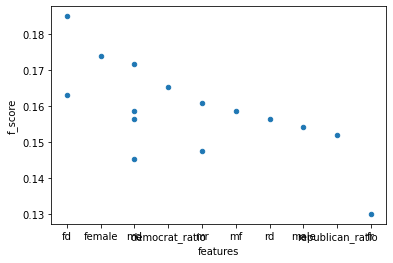

In [57]:
gender_features = {
    'male':'male', 
    'female':'female'
}

gender_race_features = {
    'white_male':      'white_male',
    'white_female':    'white_female',
    'black_male':      'black_male',
    'black_female':    'black_female',
    'hispanic_male':   'hispanic_male',
    'hispanic_female': 'hispanic_female',
    'asian_male':      'asian_male',
    'asian_female':    'asian_female'
}

party_ratio = {
    'republican_ratio': 'republican_ratio',
    'democrat_ratio': 'democrat_ratio'
}


score_avgs = [
    'binary',
    'micro',
    'macro',
    'weighted'
]
all_additional_features = []
# for fs in [gender_features.values(), gender_race_features.values(),party_ratio.values()]:
for fs in [gender_features.values(), party_ratio.values()]:
    all_additional_features += list(fs)
all_additional_features

import itertools
from functools import reduce

all_features_combinations = []
for r in range(len(all_additional_features)):
    all_features_combinations.append(list(itertools.combinations(all_additional_features,r+1)))
all_features_combinations

all_feature_f1_score_combinations = []
# def reduce(function, iterable, initializer=None):
# reduce(lambda x,y: x*100*y,[1,2],3)
for curr_combinations in all_features_combinations:
    for combination in curr_combinations:
        f_score, features_used = train_on_and_score(list(combination),score_avg='micro')
        features_used = reduce(lambda a,b: a[0]+b[0], features_used)
        __data__ = {'features': features_used, 'f_score':f_score}
        print(__data__)
        print('-'*10)
        all_feature_f1_score_combinations.append(__data__)
        
all_feature_f1_score_combinations = sorted(
    all_feature_f1_score_combinations, 
    key = lambda i: i['f_score'],
    reverse=True
)
features_f1_scores = pd.DataFrame(all_feature_f1_score_combinations)
features_f1_scores
features_f1_scores.plot(x='features',y='f_score',kind='scatter')
# print('--f1 scores of various features--')
# score_avg = score_avgs[1]
# print(f'(scores avg\'d with {score_avg})\n')
# print(f'{train_on_and_score([], score_avg=score_avg)}\n')
# print(f'{train_on_and_score([gender_features["male"]], score_avg=score_avg)}\n')
# print(f'{train_on_and_score([gender_features["female"]], score_avg=score_avg)}\n')
# print(f'{train_on_and_score([gender_features["male"],gender_features["female"]], score_avg=score_avg)}\n')
# print(f'{train_on_and_score([gender_features["male"]], score_avg=score_avg)}\n')
# print(f'{train_on_and_score(["republican_ratio"], score_avg=score_avg)}\n')
# print(f'{train_on_and_score(["democrat_ratio"], score_avg=score_avg)}\n')

In [100]:
1-np.mean(y_first_half)

0.8469162995594713

In [23]:

# tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
# tn, fp, fn, tp

(0.3392070484581498, 0.3392070484581498, 0.3392070484581498, None)

In [55]:
clf.predict_proba(X_first_half)[:,0] > .8

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True,  True, False, False,  True,  True, False,
        True,  True, False, False, False, False, False, False, False,
        True, False,  True, False,  True,  True, False,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
        True,  True,  True, False,  True, False, False,  True,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True,

In [19]:
clf.score(X_first_half,y_first_half)

0.8469162995594713

<p>testing predictions on other half of unseen data...</p>

In [12]:
X_second_half = cleaned_data[['population']][HALF_DATA:].to_numpy()
y_second_half = cleaned_data['risk_classification'][HALF_DATA:].to_numpy()

In [10]:
clf.predict(X_second_half)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
clf.score(X_second_half, y_second_half)

0.8480176211453745